# Set up

## Installation de Selenium

In [66]:
!pip install selenium

## Imports

In [67]:
import selenium
import time

import collections
from random import randint

from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from IPython.display import Image

## Preparation du drive
il faut lier le drive à l'environnement d'execution afin de pouvoir ensuite récupérer les fichiers téléchargés.

In [68]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Initialisation


## Création du navigateur et paramétrage de ses options

In [69]:
#Initialisation
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--verbose')

In [70]:
prefs = {"download.default_directory" : "/content/drive/MyDrive/Colab Notebooks/donnees_game_analytic" }
chrome_options.add_experimental_option ("prefs", prefs)

## Lancement du navigateur et accession au site de Game_analytics

In [71]:
#Lancement
browser = webdriver.Chrome(chrome_options)
browser.set_window_rect(0,0,1280,840)

{'height': 840, 'width': 1280, 'x': 0, 'y': 0}

In [72]:
browser.get('https://gamalytic.com/game-list')

# Code principal

## Création des fonctions et utilitaires

In [73]:
def screenshot():
  screenshot = browser.get_screenshot_as_png()
  display(Image(screenshot, width = '700'))

In [74]:
def click_pre_csv_button():
  pre_csv_button= browser.find_element(by=By.XPATH, value='//*[@id="basic-button"]')
  pre_csv_button.click()


def download_csv() :
  download_button= browser.find_element(by=By.XPATH, value='//*[@id="basic-menu"]/div[3]/ul/li[1]')
  download_button.click()



def download_file_two_step() :
  click_pre_csv_button()
  time.sleep(0.5)
  download_csv()



def go_to_next_data_page() :
  next_data_page_button= browser.find_element(by=By.XPATH, value='//*[@id="__next"]/div/main/div[1]/div[2]/div[2]/div/div/div/div/div[3]/div/div[2]/div/div[2]/button[2]')
  try :
    next_data_page_button.click()
    return True
  except selenium.common.ElementClickInterceptedException :
    return False

# utile pour tester la fonction précédente sur la premiere page (logique similaire)
def go_to_previous_data_page() :
  next_data_page_button= browser.find_element(by=By.XPATH, value='//*[@id="__next"]/div/main/div[1]/div[2]/div[2]/div/div/div/div/div[3]/div/div[2]/div/div[2]/button[1]')
  try :
    next_data_page_button.click()
    return True
  except selenium.common.ElementClickInterceptedException :
    return False





## Test

Il s'agit surtout de prendre des screenshot des différentes actions réalisées pour vérifier le bon fonctionnement des fonctions. En particulier les fonctions de navigation entre les pages qui servent aussi de condition d'arrêt dans la boucle principale.

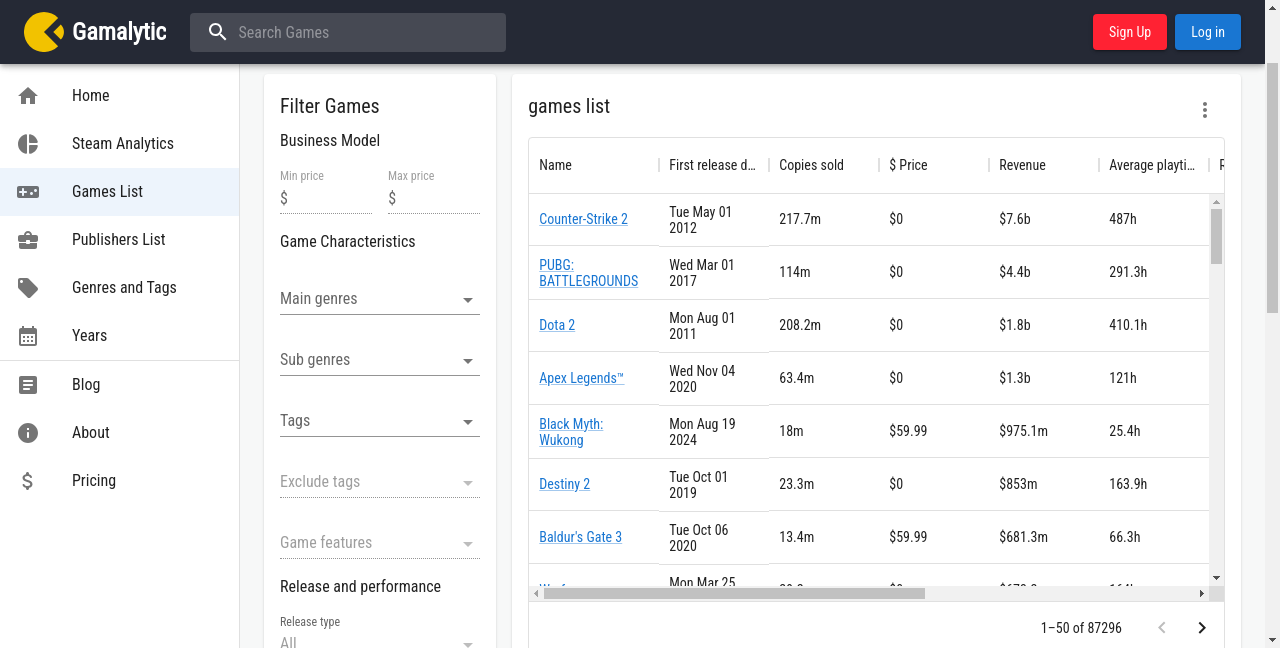

In [ ]:
screenshot()

In [ ]:
go_to_previous_data_page()

False

In [ ]:
for i in range (3) :
  time.sleep(5)
  download_file_two_step()
  go_to_next_data_page()
  i+=1

## Application

In [76]:
def get_all_informations () :
  download_file_two_step()
  a=1

  while go_to_next_data_page() == True :
    print(a)
    time.sleep(randint(2,3))
    download_file_two_step()
    a+=1



get_all_informations()

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76


KeyboardInterrupt: 

## Fin du code

In [ ]:
browser.quit()